In [ ]:
import math
import seaborn as sns
from google.colab import data_table
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.over_sampling import SMOTENC, SMOTE, RandomOverSampler

from keras.utils.np_utils import to_categorical   
from numpy import newaxis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense, Input, LSTM, Dropout, Bidirectional, Embedding, Flatten
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, f1_score
from keras.optimizers import Adam
import tensorflow as tf

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Dataset Preparation

## Call Datasets

In [ ]:
df_ashrae = pd.read_csv("/content/drive/MyDrive/WPI/Deep Learning/Project/db_measurements_v2.1.0.csv")

df_ashrae_mod = df_ashrae[['age', 'gender', 't_out', 'ta', 'rh', 'vel', 'tr', 'thermal_acceptability',
                           'thermal_preference', 'thermal_comfort', 'met', 'clo', 'thermal_sensation']]

columns = df_ashrae_mod.columns
df_ashrae_mod = df_ashrae_mod.dropna().reset_index().drop('index', axis = 1)         

#Making the range from [-3,3] to[2,2]
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: -2 if x <= -2 else x)
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: 2 if x >= 2 else x)
#Rounding off the values to make it categorical in nature 
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: np.round(x))
df_ashrae_mod = df_ashrae_mod.round(3)

# Sampling Minority Data

X = df_ashrae_mod.drop(['thermal_sensation'], axis = 1)
y = df_ashrae_mod[ 'thermal_sensation']

X = pd.get_dummies(X, columns =['gender', 'thermal_acceptability' , 'thermal_preference'])
X = X.values
y = y.values
sm = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Original dataset shape %s' % Counter(y_resampled))

Original dataset shape Counter({0.0: 1959, -1.0: 1200, 1.0: 817, -2.0: 569, 2.0: 289})
Original dataset shape Counter({2.0: 1959, 0.0: 1959, -1.0: 1200, 1.0: 817, -2.0: 569})


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_ashrae_mod.head()

,age,gender,t_out,ta,rh,vel,tr,thermal_acceptability,thermal_preference,thermal_comfort,met,clo,thermal_sensation
0,55.0,female,15.1,23.41,49.55,0.155,23.548,acceptable,cooler,5.0,1.379,0.49,-1.0
1,34.0,female,15.1,21.73,54.05,0.102,22.000,unacceptable,cooler,3.0,1.628,0.35,2.0
2,40.0,female,15.1,21.21,55.70,0.067,21.312,acceptable,no change,6.0,1.203,0.94,0.0
3,27.0,female,15.1,21.46,55.62,0.060,21.550,acceptable,no change,6.0,1.031,0.53,-1.0
4,31.0,female,15.1,22.23,52.57,0.106,22.328,acceptable,no change,5.0,1.688,0.72,1.0


AV : Air Velocity OAT: Outdoor Air Temperature Gender RH: Relative Humidity Age IAT: Indoor Air Temperature MRT: Mean Radiant Temperature IRH: Indoor Relative Humidity CF: Clothing Insulation MR: Metabolic Rate

# Model Training

## Machine Learning Models

In [ ]:
labels = ['very cold (-2)', 'cold (-1)', 'Neutral (0)', 'hot (1)', 'very hot (2)'] 

In [ ]:
# Logisitc Regression 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

pred_lr = lr_model.predict(X_test)

print('Accuracy : %.4f' % (accuracy_score(y_test, pred_lr)*100))
print('f1 score : %.4f' % (f1_score(y_test, pred_lr, average='micro')))
print('MSE score : %.4f' % (mean_squared_error(y_test, pred_lr)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

pred_lr = lr_model.predict(X_test)

print('\n')
print('Without Resampling')
print('Accuracy : %.4f' % (accuracy_score(y_test, pred_lr)*100))
print('f1 score : %.4f' % (f1_score(y_test, pred_lr, average='micro')))
print('MSE score : %.4f' % (mean_squared_error(y_test, pred_lr)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 52.4212
f1 score : 0.5242
MSE score : 1.2975


Without Resampling
Accuracy : 50.2585
f1 score : 0.5026
MSE score : 0.7725


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix Thermal Sensation LR')

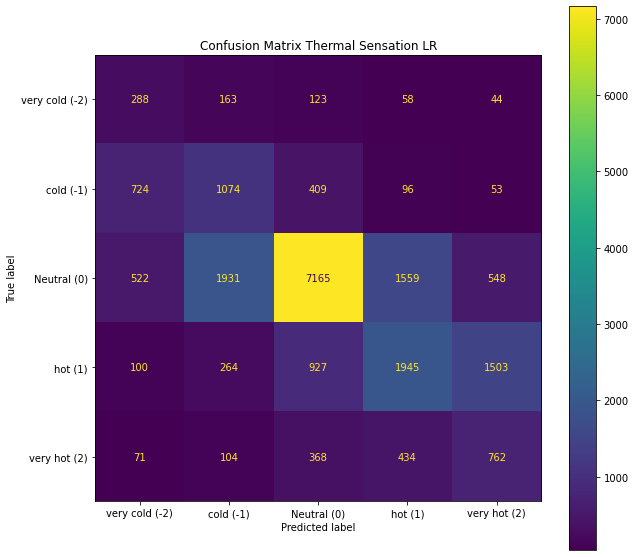

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

confusion_Matrix = confusion_matrix(pred_lr, y_test)

disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_Matrix, display_labels = labels)

plt.rcParams["figure.figsize"] = (10, 10)
disp_train.plot()
plt.title('Confusion Matrix Thermal Sensation LR')

In [ ]:
# k Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)

print('With Resampling')
print('Score of Logistic Regression Model : %.4f' % (knn_model.score(X_test, y_test)*100))
print('f1 score : %.4f' % (f1_score(y_test, pred_knn, average='micro')))
print('MSE score : %.4f' % (mean_squared_error(y_test, pred_knn)))




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)

print('\n')
print('Without Resampling')
print('Score of Logistic Regression Model : %.4f' % (knn_model.score(X_test, y_test)*100))
print('f1 score : %.4f' % (f1_score(y_test, pred_knn, average='micro')))
print('MSE score : %.4f' % (mean_squared_error(y_test, pred_knn)))

With Resampling
Score of Logistic Regression Model : 53.8048
f1 score : 0.5380
MSE score : 1.1729


Without Resampling
Score of Logistic Regression Model : 40.4343
f1 score : 0.4043
MSE score : 1.2327


Text(0.5, 1.0, 'Confusion Matrix Thermal Sensation kNN')

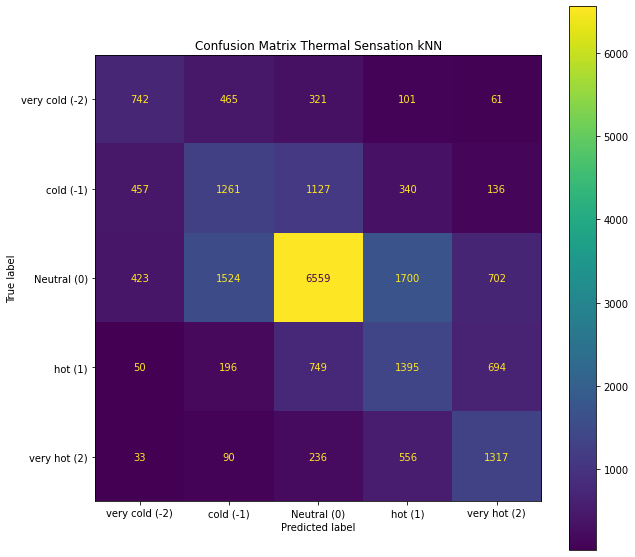

In [ ]:
confusion_Matrix = confusion_matrix(pred_knn, y_test)

disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_Matrix, display_labels = labels)

plt.rcParams["figure.figsize"] = (10, 10)
disp_train.plot()
plt.title('Confusion Matrix Thermal Sensation kNN')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators = 540) # ideally the number of estimators in a random forest algorithm should be 10 x number of features
clf.fit(X_train, y_train)
pred_rf = clf.predict(X_test)
MSE = mean_squared_error(y_test, pred_rf)
# r2 = r2_score(pred_rf, y_test['Thermal comfort'])

print('With Resampling')
print('Score of Logistic Regression Model : %.4f' % (clf.score(X_test, y_test)*100))
print('f1 score : %.4f' % (f1_score(y_test, pred_rf, average='micro')))
print('MSE score : %.4f' % (mean_squared_error(y_test, pred_rf)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators = 540) # ideally the number of estimators in a random forest algorithm should be 10 x number of features
clf.fit(X_train, y_train)
pred_rf = clf.predict(X_test)
MSE = mean_squared_error(y_test, pred_rf)
# r2 = r2_score(pred_rf, y_test['Thermal comfort'])

print('\n Without Resampling')
print('Score of Logistic Regression Model : %.4f' % (clf.score(X_test, y_test)*100))
print('f1 score : %.4f' % (f1_score(y_test, pred_rf, average='micro')))
print('MSE score : %.4f' % (mean_squared_error(y_test, pred_rf)))

With Resampling
Score of Logistic Regression Model : 68.8701
f1 score : 0.6887
MSE score : 0.4374

 Without Resampling
Score of Logistic Regression Model : 55.0155
f1 score : 0.5502
MSE score : 0.6660


Text(0.5, 1.0, 'Confusion Matrix Thermal Sensation kNN')

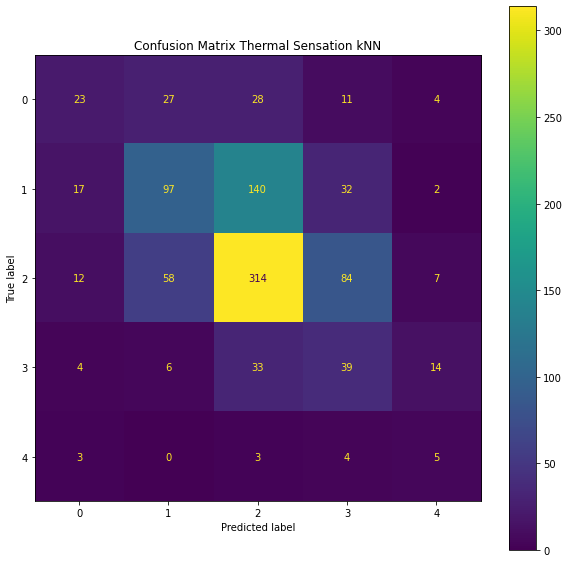

In [ ]:
confusion_Matrix = confusion_matrix(pred_knn, pred_rf)

disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_Matrix)

plt.rcParams["figure.figsize"] = (10, 10)
disp_train.plot()
plt.title('Confusion Matrix Thermal Sensation kNN')

In [ ]:
def Bagging_Classifier(nbr_est):
  clf = BaggingClassifier(n_estimators= nbr_est)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)*100

  return accuracy
  # print(f'Accuracy for activation for number of estimator  : %.4f' % accuracy)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Bagging_Accuracy = []
nbr_ests = np.arange(1,100,15)

print(' Without Resampling \n')
for nbr_est in nbr_ests:
  accuracy = Bagging_Classifier(nbr_est)
  Bagging_Accuracy.append(accuracy)
  print(f'Accuracy for {nbr_est} : %.4f' % (accuracy_score(y_test, pred_rf)*100))


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
Bagging_Accuracy = []

print(' \n With Resampling \n')
for nbr_est in nbr_ests:
  accuracy = Bagging_Classifier(nbr_est)
  Bagging_Accuracy.append(accuracy)
  print(f'Accuracy for {nbr_est} : %.4f' % (accuracy_score(y_test, pred_rf)*100))

In [ ]:
# Support Vector Machine

from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC

svm = SVC()
svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

In [ ]:
# Bayesian regression

from sklearn.metrics import r2_score

def Bayes_reg(X_train, y_train,X_test, y_test):


  model = GaussianNB().fit(X_train, y_train)
  y_pred = model.predict(X_test)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(y_pred, y_test)

  sigma = model.sigma_
  
  print("RMSE Bayesian Regression = = %.3f " %RMSE, '\n' )
  print("r2 Score Bayesian Regression = %.3f " %r2, '% \n' )
  print('Accuracy : %.4f' % (accuracy_score(y_test, y_pred)*100))
  print('f1 score : %.4f' % (f1_score(y_test, pred_rf, average='micro')))


  return model

model = Bayes_reg(X_train, y_train, X_test, y_test)

## Deep Learning Models

### Data Deep Learning Mohamed

### Data Trout Jaime

In [ ]:
df_ashrae = pd.read_csv("/content/drive/MyDrive/WPI/Deep Learning/Project/db_measurements_v2.1.0.csv")

df_ashrae_mod = df_ashrae[['age', 'gender', 't_out', 'rh_out', 'ta', 'rh', 'vel', 'tr',  'thermal_sensation', 
                         'thermal_acceptability', 'thermal_preference', 'thermal_comfort', 'met', 'clo']]

df_ashrae_mod = df_ashrae_mod.dropna(subset=['thermal_sensation'])
df_ashrae_mod = df_ashrae_mod.fillna(df_ashrae_mod.mean())

#Making the range from [-3,3] to[2,2]
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: -2 if x <= -2 else x)
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: 2 if x >= 2 else x)
#Rounding off the values to make it categorical in nature 
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: np.round(x))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-3-9978c5cf6f3f>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ashrae_mod = df_ashrae_mod.fillna(df_ashrae_mod.mean())


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
df = df_ashrae_mod.copy()
df = pd.get_dummies(df, columns =['gender', 'thermal_acceptability' , 'thermal_preference'])

train, validation, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

X_train = train.drop(['thermal_sensation'], axis = 1)
y_train = train[ 'thermal_sensation']

X_valid = validation.drop(['thermal_sensation'], axis = 1)
y_valid = validation[ 'thermal_sensation']

X_test = test.drop(['thermal_sensation'], axis = 1)
y_test = test[ 'thermal_sensation']

In [ ]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
y_train=np.asarray(y_train ,dtype=int)
y_test = np.asarray(y_test ,dtype=int)
y_valid = np.asarray(y_valid ,dtype=int)
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)
y_valid = to_categorical(y_valid, num_classes=5)

### Jaime MLP

In [ ]:
from keras.optimizers import Adam
import tensorflow as tf
# Multi Layer Perceptron

y_train=np.asarray(y_train ,dtype=int)
MLP_model = Sequential()
MLP_model.add(Dense(1024, activation='relu',  input_dim = 18 ))
MLP_model.add(Dense(512, activation='relu'))
MLP_model.add(Dense(256,activation='relu'))
MLP_model.add(Dense(128,activation='relu'))
MLP_model.add(Dense(64,activation='relu'))
MLP_model.add(Dropout(0.3))
MLP_model.add(Dense(32,activation='relu'))
MLP_model.add(Dense(16,activation='relu'))
MLP_model.add(Dense(8,activation='relu'))
MLP_model.add(Dense(5,activation='softmax'))

MLP_model.compile(optimizer=Adam(learning_rate=1e-3), loss= 'categorical_crossentropy',  
              metrics=['accuracy'])

MLP_model.fit(X_train, y_train, validation_data = (X_valid,y_valid), epochs= 100, batch_size = 64)

Epoch 1/100
996/996 [==============================] - 103s 102ms/step - loss: 1.3140 - accuracy: 0.4645 - val_loss: 1.1891 - val_accuracy: 0.5157
Epoch 2/100
996/996 [==============================] - 5s 5ms/step - loss: 1.1590 - accuracy: 0.5317 - val_loss: 1.1379 - val_accuracy: 0.5473
Epoch 3/100
996/996 [==============================] - 5s 5ms/step - loss: 1.1381 - accuracy: 0.5468 - val_loss: 1.1319 - val_accuracy: 0.5550
Epoch 4/100
996/996 [==============================] - 4s 5ms/step - loss: 1.1234 - accuracy: 0.5535 - val_loss: 1.1289 - val_accuracy: 0.5552
Epoch 5/100
996/996 [==============================] - 4s 4ms/step - loss: 1.1144 - accuracy: 0.5588 - val_loss: 1.0997 - val_accuracy: 0.5677
Epoch 6/100
996/996 [==============================] - 5s 5ms/step - loss: 1.1049 - accuracy: 0.5614 - val_loss: 1.0902 - val_accuracy: 0.5705
Epoch 7/100
996/996 [==============================] - 5s 5ms/step - loss: 1.0979 - accuracy: 0.5652 - val_loss: 1.0937 - val_accuracy: 0.

In [ ]:
model_save_name = 'JB_MLP_NN_Model_Thermal_Comfort.pt'
path = f"/content/drive/MyDrive/WPI/Deep Learning/Project/Models Trained/Thermal_Comfort/{model_save_name}" 
MLP_model.save(path)

### Multilayer Perceptron

In [ ]:

from keras.optimizers import Adam
import tensorflow as tf
# Multi Layer Perceptron
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

y_train=np.asarray(y_train ,dtype=int)
MLP_model = Sequential()
MLP_model.add(Dense(1024, activation='relu',  input_dim = 16 ))
MLP_model.add(Dense(512, activation='relu'))
MLP_model.add(Dense(256,activation='relu'))
MLP_model.add(Dense(128,activation='relu'))
MLP_model.add(Dense(64,activation='relu'))
MLP_model.add(Dropout(0.3))
MLP_model.add(Dense(32,activation='relu'))
MLP_model.add(Dense(16,activation='relu'))
MLP_model.add(Dense(8,activation='relu'))
MLP_model.add(Dense(5,activation='softmax'))

MLP_model.compile(optimizer=Adam(learning_rate=1e-3), loss= 'categorical_crossentropy',  
              metrics=['accuracy', recall_m, precision_m, f1_m])

MLP_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= 100, batch_size = 64)

Epoch 1/100
82/82 [==============================] - 2s 13ms/step - loss: 1.5586 - accuracy: 0.2935 - recall_m: 0.0223 - precision_m: 0.2307 - f1_m: 0.0369 - val_loss: 1.5137 - val_accuracy: 0.3328 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/100
82/82 [==============================] - 0s 5ms/step - loss: 1.4758 - accuracy: 0.3588 - recall_m: 0.0411 - precision_m: 0.4675 - f1_m: 0.0729 - val_loss: 1.3332 - val_accuracy: 0.4912 - val_recall_m: 0.1780 - val_precision_m: 0.7414 - val_f1_m: 0.2833
Epoch 3/100
82/82 [==============================] - 0s 5ms/step - loss: 1.3226 - accuracy: 0.4632 - recall_m: 0.1763 - precision_m: 0.7132 - f1_m: 0.2710 - val_loss: 1.2011 - val_accuracy: 0.5065 - val_recall_m: 0.1624 - val_precision_m: 0.8268 - val_f1_m: 0.2681
Epoch 4/100
82/82 [==============================] - 0s 5ms/step - loss: 1.2048 - accuracy: 0.4943 - recall_m: 0.2231 - precision_m: 0.7041 - f1_m: 0.3348 - val_loss: 1.1332 - val_accuracy: 0.

In [ ]:
from keras.optimizers import Adam
import tensorflow as tf
# Multi Layer Perceptron

y_train=np.asarray(y_train ,dtype=int)
MLP_model = Sequential()
MLP_model.add(Dense(1024, activation='relu',  input_dim = 18 ))
MLP_model.add(Dense(512, activation='relu'))
MLP_model.add(Dense(256,activation='relu'))
MLP_model.add(Dense(128,activation='relu'))
MLP_model.add(Dense(64,activation='relu'))
MLP_model.add(Dense(32,activation='relu'))
MLP_model.add(Dense(16,activation='relu'))
MLP_model.add(Dense(8,activation='relu'))
MLP_model.add(Dense(1,activation='sigmoid'))

MLP_model.compile(optimizer=Adam(lr=0.001), loss= tf.keras.losses.MeanSquaredError(), 
              metrics=['accuracy', 'mse', f1_m,precision_m, recall_m],
              weighted_metrics=['accuracy', 'mse', f1_m,precision_m, recall_m])

MLP_model.fit(X_train, y_train, validation_data = (X_valid,y_valid), epochs= 300, batch_size = 64)

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


996/996 [==============================] - 56s 54ms/step - loss: 0.9860 - accuracy: 0.4578 - mse: 0.9860 - f1_m: 0.6183 - precision_m: 592369.5000 - recall_m: 0.5785 - weighted_accuracy: 0.4578 - weighted_mse: 0.9860 - weighted_f1_m: 0.6183 - weighted_precision_m: 592369.5000 - weighted_recall_m: 0.5785 - val_loss: 0.9322 - val_accuracy: 0.4621 - val_mse: 0.9322 - val_f1_m: 0.7170 - val_precision_m: 0.6751 - val_recall_m: 0.7752 - val_weighted_accuracy: 0.4621 - val_weighted_mse: 0.9322 - val_weighted_f1_m: 0.7170 - val_weighted_precision_m: 0.6751 - val_weighted_recall_m: 0.7752
Epoch 2/300
996/996 [==============================] - 6s 6ms/step - loss: 0.9186 - accuracy: 0.4731 - mse: 0.9186 - f1_m: 0.7186 - precision_m: 0.7750 - recall_m: 0.6897 - weighted_accuracy: 0.4731 - weighted_mse: 0.9186 - weighted_f1_m: 0.7186 - weighted_precision_m: 0.7750 - weighted_recall_m: 0.6897 - val_loss: 0.9127 - val_accuracy: 0.4776 - val_mse: 0.9127 - val_f1_m: 0.7237 - val_precision_m: 0.8199 - v

KeyboardInterrupt: ignored

In [ ]:
from keras.engine.base_layer import Layer
# Linear Regression: Standard and Bayesian Ridge

def MLP_Classifier(act_fctn, layer, X_train, y_train,X_test, y_test):

  nlp_model = MLPClassifier(activation = act_fctn, hidden_layer_sizes = (layer,))
  nlp_model.fit(X_train, y_train)

  y_pred = nlp_model.predict(X_test)

  RMSE = mean_squared_error(y_test, y_pred)
  # r2_score = r2_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)*100

  print("RMSE = %.3f " %RMSE, '\n' )
  # print("r2 Score  = %.3f " %r2, '% \n' )
  print(f'Accuracy for activation {act_fctn} for {layer} : %.4f' % accuracy)
  print('f1 score : %.4f' % (f1_score(y_test, y_pred, average='micro')))


  return nlp_model, accuracy, nlp_model.score(X_test, y_test)

act_fcts = ["identity", "logistic", "tanh", "relu"]

layers = np.arange(1, 10, 2)
act_fct = "logistic"

Score_NLC_Id = []; Score_NLC_lg = []; Score_NLC_t = []; Score_NLC_rl = []
Accuracy_NLC_Id = []; Accuracy_NLC_lg = []; Accuracy_NLC_t = []; Accuracy_NLC_rl = []

i = 0

for act_fct in act_fcts:    
  for layer in layers:
    
    model_nlp, accuracy, score = MLP_Classifier(act_fct, layer, X_train, y_train,X_test, y_test) 
    if i == 0:
      Score_NLC_Id.append(score)
      Accuracy_NLC_Id.append(accuracy)
    if i == 1:
      Score_NLC_lg.append(score)
      Accuracy_NLC_lg.append(accuracy)
    if i == 2:
      Score_NLC_t.append(score)
      Accuracy_NLC_t.append(accuracy)
    if i == 3: 
      Score_NLC_rl.append(score)
      Accuracy_NLC_rl.append(accuracy)
  i= i+1

In [ ]:
model_nlp, accuracy, score = MLP_Classifier('logistic', 10, X_train, y_train,X_test, y_test)

In [ ]:
model_save_name = 'MLP_Function_Lib_Model_Thermal_Comfort.pt'
path = f"/content/drive/MyDrive/WPI/Deep Learning/Project/Models Trained/ Thermal_Comfort/{model_save_name}" 
model.save(path)

### CNN 

In [ ]:
# CNN

from tensorflow.keras import layers
import tensorflow as tf


model = Sequential()
model.add(Dense(256, input_dim = 18, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss= tf.keras.losses.MeanSquaredError(), 
              metrics=['accuracy', 'mse', f1_m,precision_m, recall_m],
              weighted_metrics=['accuracy', 'mse', f1_m,precision_m, recall_m])

model.fit(X_train, y_train, validation_data = (X_valid,y_valid), epochs= 500, batch_size = 120)

In [ ]:
from tensorflow import keras

model_save_name = 'CNN_Model_Thermal_Comfort_1.pt'
path = f"/content/drive/MyDrive/WPI/Deep Learning/Project/Models Trained/ Thermal_Comfort/{model_save_name}" 
model.save(path)


In [ ]:
# CNN

from tensorflow.keras import layers
import tensorflow as tf


model = Sequential()
model.add(Dense(256, input_dim = 18, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss= tf.keras.losses.MeanSquaredError(), 
              metrics=['accuracy', 'mse', f1_m,precision_m, recall_m],
              weighted_metrics=['accuracy', 'mse', f1_m,precision_m, recall_m])

model.fit(X_train, y_train, validation_data = (X_valid,y_valid), epochs= 100, batch_size=235)

In [ ]:
from tensorflow import keras

model_save_name = 'CNN_Model_Thermal_Comfort.pt'
path = f"/content/drive/MyDrive/WPI/Deep Learning/Project/Models Trained/ Thermal_Comfort/{model_save_name}" 
model.save(path)


### LSTM

In [ ]:
df_ashrae = pd.read_csv("/content/drive/MyDrive/WPI/Deep Learning/Project/db_measurements_v2.1.0.csv")

df_ashrae_mod = df_ashrae[['age', 'gender', 't_out', 'ta', 'rh', 'vel', 'tr', 'thermal_acceptability',
                           'thermal_preference', 'thermal_comfort', 'met', 'clo', 'thermal_sensation']]

columns = df_ashrae_mod.columns
df_ashrae_mod = df_ashrae_mod.dropna().reset_index().drop('index', axis = 1)         

#Making the range from [-3,3] to[2,2]
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: -2 if x <= -2 else x)
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: 2 if x >= 2 else x)
#Rounding off the values to make it categorical in nature 
df_ashrae_mod['thermal_sensation'] = df_ashrae_mod['thermal_sensation'].apply(lambda x: np.round(x))
df_ashrae_mod = df_ashrae_mod.round(3)

# Sampling Minority Data

X = df_ashrae_mod.drop(['thermal_sensation'], axis = 1)
y = df_ashrae_mod[ 'thermal_sensation']

X = pd.get_dummies(X, columns =['gender', 'thermal_acceptability' , 'thermal_preference'])
X = X.values
y = y.values
sm = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Original dataset shape %s' % Counter(y_resampled))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [ ]:
from keras.layers import Embedding,Conv1D,LSTM,Input,TimeDistributed,SpatialDropout1D,Flatten,Dropout, Bidirectional

model_lstm = Sequential()
model_lstm.add(LSTM(256, return_sequences=True))
model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(Dense(8,activation='sigmoid'))
model_lstm.add(Dense(1,activation='sigmoid'))


model_lstm.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy', 'mse', f1_m,precision_m, recall_m],
              weighted_metrics=['accuracy', 'mse', f1_m,precision_m, recall_m])

model_lstm.fit(X_train, y_train, epochs = 150, validation_data=(X_test,y_test), batch_size = 128)

In [ ]:
model_save_name = 'LSTM_Model_Thermal_Comfort_1.pt'
path = f"/content/drive/MyDrive/WPI/Deep Learning/Project/Models Trained/ Thermal_Comfort/{model_save_name}" 
model.save(path)

In [ ]:
from keras.layers import Embedding,Conv1D,LSTM,Input,TimeDistributed,SpatialDropout1D,Flatten,Dropout, Bidirectional

model=Sequential()
x_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1],-1)
model.add(LSTM(256, return_sequences=True, input_shape=(18,1)))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.001),
              loss = tf.keras.losses.MeanSquaredError() ,
              metrics=['accuracy', 'mse', f1_m,precision_m, recall_m],
              weighted_metrics=['accuracy', 'mse', f1_m,precision_m, recall_m])
  
model.fit(x_train, y_train, epochs = 150, validation_data=(X_valid,y_valid), batch_size = 64)

In [ ]:
model_save_name = 'LSTM_Model_Thermal_Comfort.pt'
path = f"/content/drive/MyDrive/WPI/Deep Learning/Project/Models Trained/ Thermal_Comfort/{model_save_name}" 
model.save(path)

### bi_LSTM

In [ ]:
from keras.layers import Bidirectional
from keras.layers import Dense, Input, LSTM, Dropout, Bidirectional, Embedding, Flatten

model=Sequential()
x_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1],-1)
model.add(Bidirectional(LSTM(256,return_sequences=True, input_shape=(18,1))))
model.add(LSTM(256,return_sequences=True))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='softmax'))

model.compile(optimizer=Adam(lr=0.001),
              loss = tf.keras.losses.MeanSquaredError() ,
              metrics=['accuracy', 'mse', f1_m,precision_m, recall_m],
              weighted_metrics=['accuracy', 'mse', f1_m,precision_m, recall_m])
  
model.fit(x_train, y_train, validation_data=(X_valid,y_valid), epochs = 100,  batch_size = 235)

In [ ]:
model_save_name = 'Bi_LSTM_Model_Thermal_Comfort.pt'
path = f"/content/drive/MyDrive/WPI/Deep Learning/Project/Models Trained/ Thermal_Comfort/{model_save_name}" 
model.save(path)

### LSTM-CNN

In [ ]:
  y_train=np.asarray(y_train ,dtype=int)
  y_train=to_categorical(y_train,num_classes=5)
  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],-1)

  model=Sequential()
  model.add(Conv1D(filters=128,kernel_size=5,padding='same',input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(SpatialDropout1D(0.1))
  model.add(LSTM(256,return_sequences=True))
  model.add(LSTM(256,return_sequences=True))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(5,activation='softmax'))
  
  model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'],weighted_metrics=['accuracy'])
  
  checkpoint_filepath = '/tmp/checkpoint'
  
  es=ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_accuracy',save_best_only=True,mode='max',save_weights_only=True)
  model.fit(X_train,y_train,epochs=100,validation_split=0.2,batch_size=64,callbacks=[es],class_weight=weight_dicts)

In [ ]:
model_save_name = 'LSTM_CNN_Model_Thermal_Comfort.pt'
path = f"/content/drive/MyDrive/WPI/Deep Learning/Project/Models Trained/ Thermal_Comfort/{model_save_name}" 
model.save(path)

## Transfer Learning

In [ ]:
model=Sequential()
X_train1=X_train_temp.reshape(X_train_temp.shape[0],X_train_temp.shape[1],-1)
model.add(LSTM(256,return_sequences=True,input_shape=(X_train1.shape[1],X_train1.shape[2])))
model.add(LSTM(256,return_sequences=True))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(5,activation='softmax'))


model.layers[-1].set_weights(weights)
model.layers[-1].trainable=False


X_t1,X_t2,y_t1,y_t2=train_test_split(X_test,y_test,test_size=0.1,random_state=2)

X_t=X_t1.values
X_t=X_t.reshape(X_t.shape[0],X_t.shape[1],-1)

#Target domain DL model
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'],weighted_metrics=['accuracy'])
checkpoint_filepath = '/tmp/checkpoint'
es=ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_accuracy',save_best_only=True,mode='max',save_weights_only=True)
model.fit(X_t,y_t1,epochs=100,validation_split=0.2,batch_size=64,callbacks=[es])
model.load_weights(checkpoint_filepath)